In [1]:
from netCDF4 import Dataset
from scipy.io          import netcdf
from scipy.integrate   import simps

import numpy as np
import json
import h5py
import matplotlib.pyplot as plt
from boutdata import collect

from Analysis import Analyse
from matplotlib.pyplot import imshow, show, plot

In [2]:
Anal = Analyse('../FELTOR-model/output.nc')
Anal.integrate('ions')

array([314.15967677, 314.15967412, 314.15966925, 314.15966215,
       314.15965281, 314.15964119, 314.15962728, 314.15961106,
       314.15959252])

In [3]:
File_name = '../FELTOR-model/output.nc'
Data = Dataset(File_name)


# plt.imshow(nc['Temp'][1,:,0,:])
# plt.show()
feltor_input = json.loads(Data.inputfile)

Data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    inputfile: {
   "Nx" : 120,
   "Nx_out" : 60,
   "Ny" : 120,
   "Ny_out" : 60,
   "amplitude" : 0.5,
   "bc_x" : "DIR",
   "bc_y" : "DIR",
   "cols" : 2,
   "curvature" : 0.014999999999999999,
   "dt" : 0.01,
   "eps_pol" : 9.9999999999999995e-07,
   "eps_time" : 1e-10,
   "height" : 500,
   "itstp" : 10,
   "lx" : 200,
   "ly" : 200,
   "maxout" : 8,
   "n" : 3,
   "n_out" : 3,
   "nu_perp" : 0.0050000000000000001,
   "posX" : 0.5,
   "posY" : 0.5,
   "rows" : 1,
   "sigma" : 10,
   "stages" : 3,
   "width" : 1000
}

    dimensions(sizes): x(180), y(180), time(9), energy_time(81)
    variables(dimensions): float64 x(x), float64 y(y), float64 time(time), float64 electrons(time,y,x), float64 ions(time,y,x), float64 potential(time,y,x), float64 vorticity(time,y,x), float64 energy_time(energy_time), float64 mass(energy_time), float64 mass_diss(energy_time), float64 entropy(energy_time), float64 entro

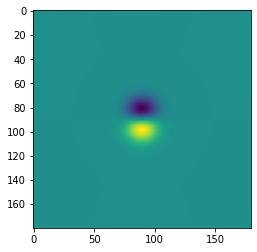

In [4]:
# print(nc['ions'][1, :, :])

imshow(Data['vorticity'][1, :, :]);
show()

## Center of Mass

In [5]:
from numpy import tile, arange, array, copy

In [6]:
x    = array(Data['x'][:])
Nx   = len(x)

y    = array(Data['y'][:])
Ny   = len(y)
particles = array(Data['ions'][:])


def CM(x, y, n):
    
    x_vec, y_vec = copy(x), copy(y)
    
    Nx, Ny = len(x_vec), len(y_vec)
    
    X_mat = tile(x_vec.reshape(Nx, 1), Ny)
    Y_mat = tile(y_vec.reshape(Ny, 1), Nx).transpose()
        
    X_CM, Y_CM   = np.sum(X_mat * n, axis = (1,2)), np.sum(Y_mat * n, axis = (1,2))
    n_total = np.sum(n, axis = (1,2))
    
    return X_CM / n_total, Y_CM / n_total

X_CM, Y_CM = CM(x, y, particles)


## Integrate

In [7]:
from scipy.integrate   import simps

In [19]:
print(Anal.Data['mass'][:])
print(Anal.integrate('ions'))

[314.15926536 314.15926536 314.15926536 314.15926536 314.15926536
 314.15926536 314.15926536 314.15926536 314.15926536 314.15926536
 314.15926536 314.15926535 314.15926535 314.15926535 314.15926535
 314.15926535 314.15926535 314.15926534 314.15926534 314.15926534
 314.15926533 314.15926533 314.15926533 314.15926532 314.15926532
 314.15926531 314.1592653  314.1592653  314.15926529 314.15926528
 314.15926527 314.15926527 314.15926526 314.15926525 314.15926524
 314.15926523 314.15926521 314.1592652  314.15926519 314.15926517
 314.15926516 314.15926514 314.15926513 314.15926511 314.15926509
 314.15926508 314.15926506 314.15926504 314.15926501 314.15926499
 314.15926497 314.15926495 314.15926492 314.1592649  314.15926487
 314.15926484 314.15926481 314.15926478 314.15926475 314.15926472
 314.15926469 314.15926465 314.15926462 314.15926458 314.15926455
 314.15926451 314.15926447 314.15926443 314.15926438 314.15926434
 314.1592643  314.15926425 314.1592642  314.15926415 314.1592641
 314.159264

In [12]:
x - np.roll(x, 1)

array([-199.24865556,    1.29099445,    1.29099445,    0.75134444,
          1.29099445,    1.29099445,    0.75134444,    1.29099445,
          1.29099445,    0.75134444,    1.29099445,    1.29099445,
          0.75134444,    1.29099445,    1.29099445,    0.75134444,
          1.29099445,    1.29099445,    0.75134444,    1.29099445,
          1.29099445,    0.75134444,    1.29099445,    1.29099445,
          0.75134444,    1.29099445,    1.29099445,    0.75134444,
          1.29099445,    1.29099445,    0.75134444,    1.29099445,
          1.29099445,    0.75134444,    1.29099445,    1.29099445,
          0.75134444,    1.29099445,    1.29099445,    0.75134444,
          1.29099445,    1.29099445,    0.75134444,    1.29099445,
          1.29099445,    0.75134444,    1.29099445,    1.29099445,
          0.75134444,    1.29099445,    1.29099445,    0.75134444,
          1.29099445,    1.29099445,    0.75134444,    1.29099445,
          1.29099445,    0.75134444,    1.29099445,    1.29099

In [9]:

x    = array(Data['x'][:])
Nx   = len(x)

y    = array(Data['y'][:])
Ny   = len(y)
mass = array(Data['ions'][:])

Integral = simps(mass, x, axis = 1)
Integral = simps(Integral, y, axis = 1)

print(Integral)

[314.15967677 314.15967412 314.15966925 314.15966215 314.15965281
 314.15964119 314.15962728 314.15961106 314.15959252]


In [10]:
np.ndim(mass)

3